In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from kohonen import Kohonen
from oja import Oja
from sklearn.decomposition import PCA

plt.rcParams.update({'font.size': 20})
plt.rc('figure', figsize=(10, 10))
plt.rc('figure', facecolor=(1,1,1,1))

In [2]:
 #loading data
dataset = pd.read_csv('europe.csv')

#le sacamos el nombre de los paises
countries = dataset.iloc[:,0]
variable_names = dataset.iloc[:,1:].columns
variables = dataset.iloc[:, 1:].values



standarized = (variables - variables.mean(axis=0))/variables.std(axis=0)

In [3]:
def plot_variables(variable_names, axis):
    plt.barh([i for i in range(len(axis))], axis)
    plt.yticks([i for i in range(len(axis))], variable_names)


In [4]:
def plot_index(countries, components):
    data = [ (name, component) for name, component in zip(countries, components)]
    sorted_data = np.array(sorted(data, key=lambda x: x[1]))
    plt.barh([i for i in range(len(sorted_data))], sorted_data[:,1])
    plt.yticks([i for i in range(len(sorted_data))], sorted_data[:,0])
    plt.xticks([])

In [5]:
network = Oja(standarized, seed=17)

network.train(epochs=500, lr = 0.001)

components = [network.predict(c) for c in standarized]

axis = np.diag(np.ones(standarized.shape[1]))

axis = [network.predict(ax) for ax in axis]

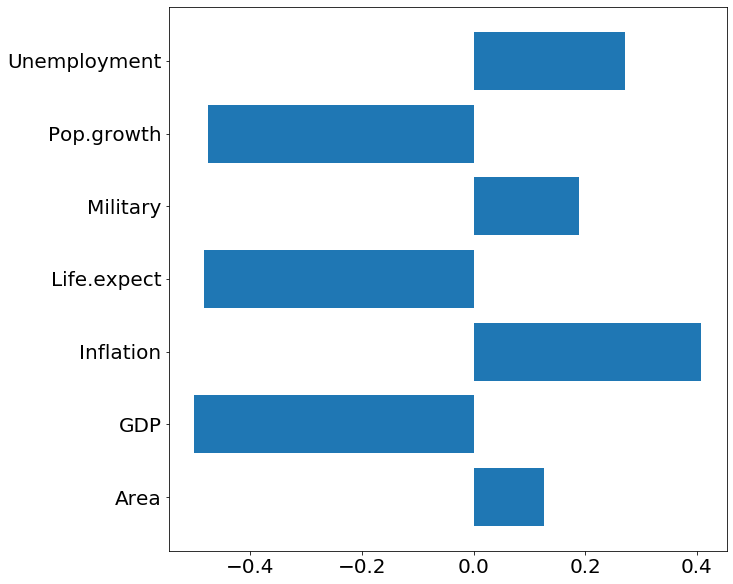

In [6]:
plt.figure("Barh oja")
plot_variables(variable_names, axis)

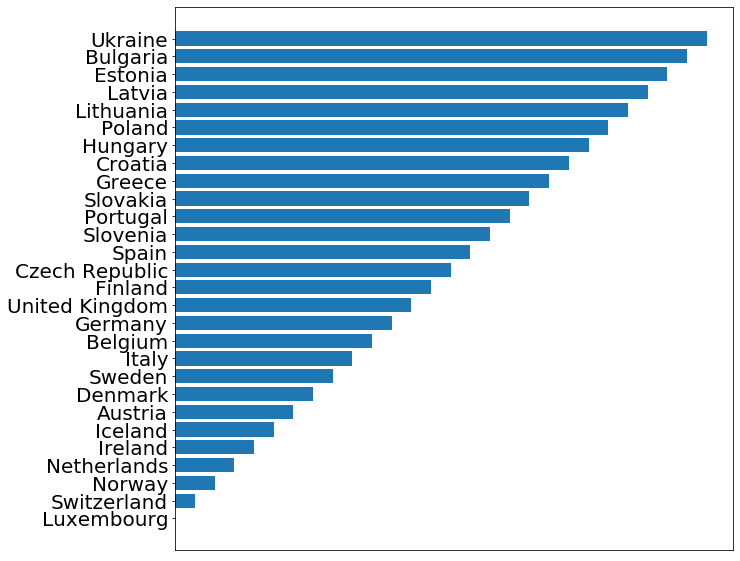

In [7]:
plt.figure("index oja")
plot_index(countries, components)

In [8]:
pca = PCA()
components = pca.fit_transform(standarized)
axis = pca.components_[0]

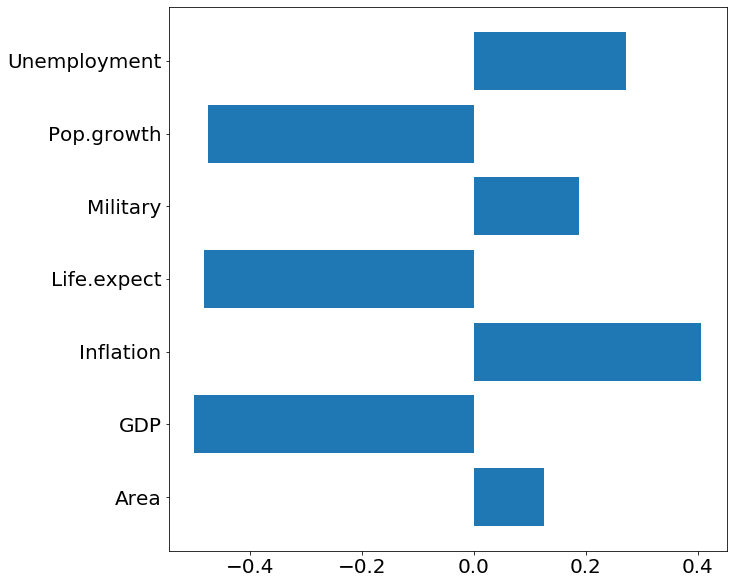

In [9]:
plt.figure("Barh pca")
plot_variables(variable_names, axis)

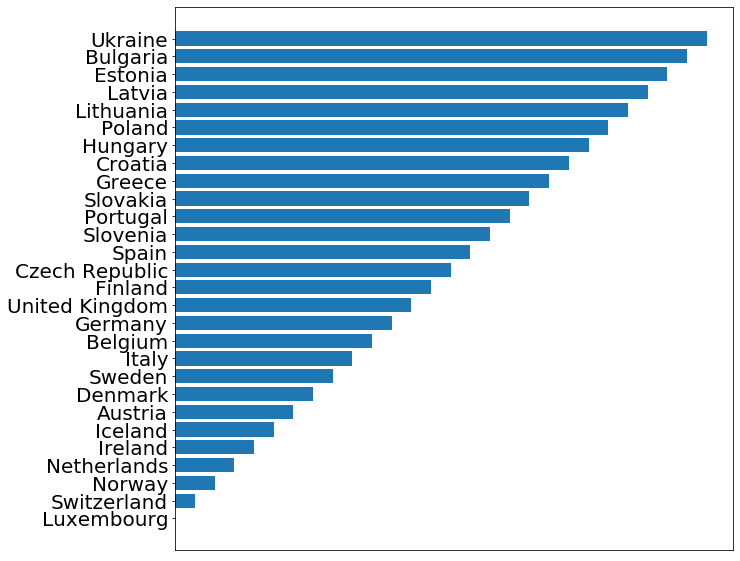

In [11]:

plt.figure("index pca")
plot_index(countries, components[:,0])